# Tutorial 
## Creating and Extending Erdos-Renyi and Barabasi-Albert Networks
We will begin by importing the necessary packages and scripts

In [6]:
import os
from FIDDLE.FIDDLE import *

## Next we must set key parameters to describe the network we wish to create

In [7]:
#Specifying key variables for network creation:

#     Attribute of your network
network_type = 5
nodes = 10 
positive_probability = 0.5

# #     Additional but unnecessary attributes for your network
# edge_probability=0.5 #Only affects network_type = 2 or 4
# attaching_edges=2 #Only affects network_type = 5

#     Directory to save the output
directory = 'ExampleOutput/1_Sample_Network/'
os.makedirs(directory, exist_ok = True)

#     Variables to save the network
network_description_file = directory + "network_description.txt"
network_figure_file = directory + "network_figure.png"
network_model_file = directory + "network_full.xlsx"

#Variables to run a simulation
network_trace_file = directory + "network_trace.txt"


## Creating the network itself

In [8]:
#Create the network
G = graph_maker(network_type, nodes, positive_probability)
# print(type(G))

# See the edges in G
edge_list = get_model_edges(G)
# print(edge_list)

# See the Characteristics of the created network
# return_model_stats(G, network_type, nodes, positive_probability)
return_model_stats(G, network_type, nodes, positive_probability, save = True, filename = network_description_file)

------------------ Specified Network Characteristics ------------------
Network Type: 5
Specified Nodes: 10
Specified Probability of Positive Edges: 0.5
Specified 'edge_probability' (only affects Type 2 and 4): 0.5
Specified 'attaching_edges' (only affects Type 5): 2

-------------------- Actual Network Characteristics -------------------
Number of Actual Nodes: 10
Number of Directed Edges: 16
Number of Positive Edges: 9
Number of Negative Edges: 7
Actual Probability of Positive Edges: 0.5625

----------------- Descriptive Network Characteristics -----------------
Network Density: 0.17777777777777778
Undirected Edges: 32
Network Average Degree: 3.2
Undirected Model Diameter: 3
Undirected Model Clustering: 0.54

---------------------------- List of Edges ---------------------------
['0', '1', '-']
['0', '2', '+']
['0', '3', '-']
['0', '5', '+']
['0', '7', '-']
['1', '5', '+']
['1', '6', '+']
['2', '3', '+']
['2', '4', '-']
['2', '9', '+']
['3', '4', '+']
['3', '6', '+']
['3', '7', '-']


## Visualizing the Network

<Figure size 500x500 with 0 Axes>

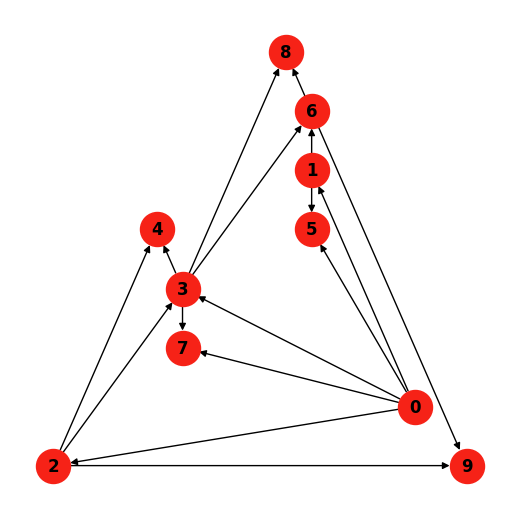

In [9]:
# See the network itself
#Saving the figure
plot_network(G, save = True, filename = network_figure_file)

#Displaying the figure (not saving)
plot_network(G)

## Saving the network to a file

In [5]:
#Saving the network to an excel file
# network_to_excel(G)
network_to_excel(G, filename = network_model_file)

## Initializing the network and getting it ready for simulation

In [6]:
#Create an initialization scheme for the network
initial_vals = create_initial_values(G, initial=1)
# initial_vals = create_initial_values_random(G, lower_bound = 0, upper_bound = 2)
# initial_vals = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
# initial_vals = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '10':10}
# initial_vals = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10':10}
print(initial_vals)

#Add initial values to the network file
update_network_file(filename = network_model_file, update_column = 6, update_values = initial_vals)

{'0': 1, '2': 1, '3': 1, '4': 1, '8': 1, '9': 1, '5': 1, '6': 1, '7': 1, '1': 1}


## Simulating the Network based on the initial values and network structure

In [7]:
#Simulate the network

#Initialization of key parameters:
simulation_runs = 10 #simRun
simulation_length = 100 #simLen

#Simulate the network
simulate_network(network_model_file, simulation_runs, simulation_length, network_trace_file)

## Saving the simulation end values

In [8]:
#Identify the simulation end state and values
end_vals = get_simulation_end_values(network_trace_file, simulation_runs)

#Update the network file to include the end values for each node
update_network_file(filename = network_model_file, update_column = 7, update_values = end_vals)


## Creating extendable models from the base network we just created

In [21]:
# Definingh key Variables
output_directory = 'ExampleOutput/2_Sample_Removal/'
removal_probabilities = [0.1, 0.25]

#Wrapper function to create extenable models from base G
create_extendable_models(G, output_directory, removal_probabilities, end_vals, model_name = 'network', positive_probability = 0.5)

# #Copy in relevant full network files such that we can see the removal process
# os.system("cp "+network_description_file+" "+output_directory+str(network_description_file.split("/")[-1]))
# os.system("cp "+network_figure_file+" "+output_directory+str(network_figure_file.split("/")[-1]))
# os.system("cp "+network_model_file+" "+output_directory+str(network_model_file.split("/")[-1]))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

## Extending models 

In [22]:
#Getting the directory ready 
# Creating the directory to store this example
extension_directory = 'ExampleOutput/3_Extension/'
os.makedirs(extension_directory, exist_ok=True)

# Copying in the relevant Files
#    Network to be extended
file_to_copy = "ExampleOutput/2_Sample_Removal/Missing_25_percent/network_missing_25_percent.xlsx"
new_filename = "network_to_extend.xlsx"
os.system("cp " + file_to_copy + " " + extension_directory+new_filename)
network_file_location = extension_directory+new_filename

#    Real Extensions (those that were actually in the initial baseline model)
file_to_copy = "ExampleOutput/2_Sample_Removal/Missing_25_percent/network_missing_25_percent_grouped_real_ext"
new_filename = "extensions_real"
os.system("cp " + file_to_copy + " " + extension_directory+new_filename)
extensions_real_location = extension_directory+new_filename

#    Fake Extensions (those that were never in the initial baseline model)
file_to_copy = "ExampleOutput/2_Sample_Removal/Missing_25_percent/network_missing_25_percent_grouped_fake_ext"
new_filename = "extensions_fake"
os.system("cp " + file_to_copy + " " + extension_directory+new_filename)
extensions_fake_location = extension_directory+new_filename

In [23]:
# In reality, you won't know which extensions are real or fake. Let's combine the files now to mimic real life. 
with open(extensions_real_location,'rb') as extensions: extensions_real = pickle.load(extensions)
with open(extensions_fake_location,'rb') as extensions: extensions_fake = pickle.load(extensions)

#Initialize list for all extensions
total_extensions = []

#Seed the random generator 
random.seed()

#While not perfect, this ensure the extensions are added in a semi-mixed format with real/fake extensions not being lumped in the front or back 
for real, fake in zip(extensions_real, extensions_fake):

    #Pick a random number
    prob = random.random()

    #Add real first
    if prob > 0.5: 
        total_extensions.append(real)
        total_extensions.append(fake)

    #Add fake first
    else: 
        total_extensions.append(fake)
        total_extensions.append(real)

#Saving the total extensions now
with open(extension_directory+"all_extensions",'wb') as extensions: pickle.dump(total_extensions, extensions)

## Extending the model via BFA

In [24]:
#Set the directory to extend the model in a BFA manner
output_directory = 'ExampleOutput/3_Extension/BFA/'

start_model = 'ExampleOutput/3_Extension/network_to_extend.xlsx'
extensions_file = extension_directory+"all_extensions"
with open(extensions_file,'rb') as extensions: possible_extensions = pickle.load(extensions)

#Parameterizing key variables for the extension process
# Many of these variables were set above during the network creation phase. 
# They are being re-set here for clarity and convenience.
# weight = 1                          #Don't worry about this, this is for future work 
# num_Scen = 1                        #Don't worry about this, this is for future work 
simulation_runs = 10
simulation_length = 100

#Unsupported for no
#Set multiprocessing capabilities
# numCores = 1
# numCores = multiprocessing.cpu_count()

In [25]:
BFA(start_model, possible_extensions, simulation_runs, simulation_length, output_directory)

Initial difference between the correct and current model: 4.8
Extension: [0, ['0', '9', '+']] has a score of: 1.2
Extension: [15, ['9', '4', '+']] has a score of: 0.5
Extension: [16, ['1', '5', '-']] has a score of: 0.30000000000000004
Extension: [1, ['2', '3', '+']] has a score of: 1.5
Extension: [2, ['4', '7', '+']] has a score of: 2.3
Extension: [17, ['4', '8', '-']] has a score of: 0.10000000000000003
Extension: [3, ['0', '3', '-']] has a score of: 1.8000000000000003
Extension: [18, ['6', '7', '-']] has a score of: 1.5
Extension: [19, ['3', '1', '+']] has a score of: 1.6
Extension: [4, ['0', '8', '-']] has a score of: 0.19999999999999996
Extension: [5, ['2', '6', '-']] has a score of: 0.19999999999999996
Extension: [20, ['8', '7', '+']] has a score of: 1.8
Extension: [6, ['2', '9', '+']] has a score of: 1.5
Extension: [21, ['3', '1', '+']] has a score of: 1.5
Minimum found of: 0.10000000000000003 with extension 17
Minimum was less than previous score, saving best extension.
Extensi

## Extending the model via DFA

In [26]:
#Set the directory to extend the model in a BFA manner
output_directory = 'ExampleOutput/3_Extension/DFA/'

start_model = 'ExampleOutput/3_Extension/network_to_extend.xlsx'
extensions_file = extension_directory+"all_extensions"
with open(extensions_file,'rb') as extensions: possible_extensions = pickle.load(extensions)

#Parameterizing key variables for the extension process
# Many of these variables were set above during the network creation phase. 
# They are being re-set here for clarity and convenience.
# weight = 1                          #Don't worry about this, this is for future work 
# num_Scen = 1                        #Don't worry about this, this is for future work 
simulation_runs = 10
simulation_length = 100

#Unsupported for no
#Set multiprocessing capabilities
# numCores = 1
# numCores = multiprocessing.cpu_count()

In [27]:
DFA(start_model, possible_extensions, simulation_runs, simulation_length, output_directory)

Initial difference between the correct and current model: 4.6
Starting extending the current best model with extension: 0
Extension: [0, ['0', '9', '+']] has a score of: 1.2
Extension: [0, ['0', '9', '+']] is an improvement.
Starting extending the current best model with extension: 15
Extension: [15, ['9', '4', '+']] has a score of: 6.5
Starting extending the current best model with extension: 16
Extension: [16, ['1', '5', '-']] has a score of: 1.5
Starting extending the current best model with extension: 1
Extension: [1, ['2', '3', '+']] has a score of: 2.7
Starting extending the current best model with extension: 2
Extension: [2, ['4', '7', '+']] has a score of: 3.4
Starting extending the current best model with extension: 17
Extension: [17, ['4', '8', '-']] has a score of: 1.1
Extension: [17, ['4', '8', '-']] is an improvement.
Starting extending the current best model with extension: 15
Extension: [15, ['9', '4', '+']] has a score of: 6.4
Starting extending the current best model w